<a href="https://colab.research.google.com/github/pergazuz/Leukemia-Classification-based-on-Microscopic-Images/blob/main/CPE352_Project_Prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data from kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/colab"

In [ ]:
#changing the working directory
%cd /content
#Check the present working directory using pwd command
!kaggle datasets download -d andrewmvd/leukemia-classification

/content
 99% 858M/867M [00:08<00:00, 73.0MB/s]
100% 867M/867M [00:08<00:00, 102MB/s] 


In [ ]:
!unzip /content/leukemia-classification.zip  && /content/leukemia-classification.zip

In [ ]:
!pip install tensorflow

# Import lib

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


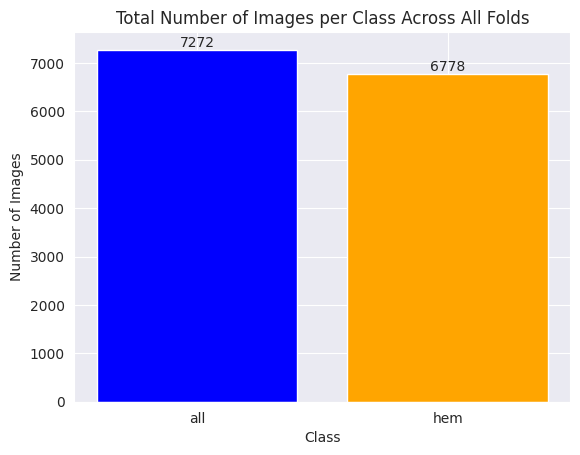

In [ ]:
# Define the base directory for training data
base_dir = "/content/C-NMC_Leukemia/training_data"

# Initialize a dictionary to hold the count of images in each class across all folds
class_counts = {'all': 0, 'hem': 0}

# Loop through each fold and add the counts to the class_counts dictionary
for fold in ['fold_0', 'fold_1', 'fold_2']:
    fold_path = os.path.join(base_dir, fold)
    for class_name in ['all', 'hem']:
        class_path = os.path.join(fold_path, class_name)
        num_images = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])
        class_counts[class_name] += num_images

# Plotting
fig, ax = plt.subplots()

# Set of different colors for the bars
colors = ['blue', 'orange']

# Plot the counts for each class
ax.bar(class_counts.keys(), class_counts.values(), color=colors)

# Adding the count above each bar
for i, (class_name, count) in enumerate(class_counts.items()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class Across All Folds')

# Show the plot
plt.show()

In [ ]:
!pip install albumentations

In [ ]:
import os
import matplotlib.pyplot as plt
import albumentations as A
from albumentations import ImageOnlyTransform

# Define the base directory for training data
base_dir = "/content/C-NMC_Leukemia/training_data"

# Initialize a dictionary to hold the count of images in each class across all folds
class_counts = {'all': 0, 'hem': 0}

# Data augmentation settings with Albumentations
augmentation_transform = A.Compose([
    A.GaussianBlur(blur_limit=(3, 7), p=1.0),
])

# Loop through each fold and add the counts to the class_counts dictionary
for fold in ['fold_0', 'fold_1', 'fold_2']:
    fold_path = os.path.join(base_dir, fold)

    for class_name in ['all', 'hem']:
        class_path = os.path.join(fold_path, class_name)
        num_images = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])

        # Augment the 'hem' class images
        if class_name == 'hem':
            # Create a directory to store augmented images
            augmented_path = os.path.join(fold_path, 'augmented_' + class_name)
            os.makedirs(augmented_path, exist_ok=True)

            # Apply augmentation and save augmented images using Albumentations
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                img = plt.imread(image_path)

                # Apply augmentation
                augmented_img = augmentation_transform(image=img)['image']

                # Save augmented image
                augmented_image_path = os.path.join(augmented_path, f'aug_{image_name}')
                plt.imsave(augmented_image_path, augmented_img)

        class_counts[class_name] += num_images

# Plotting
fig, ax = plt.subplots()

# Set of different colors for the bars
colors = ['blue', 'orange']

# Plot the counts for each class
ax.bar(class_counts.keys(), class_counts.values(), color=colors)

# Adding the count above each bar
for i, (class_name, count) in enumerate(class_counts.items()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class Across All Folds')

# Show the plot
plt.show()


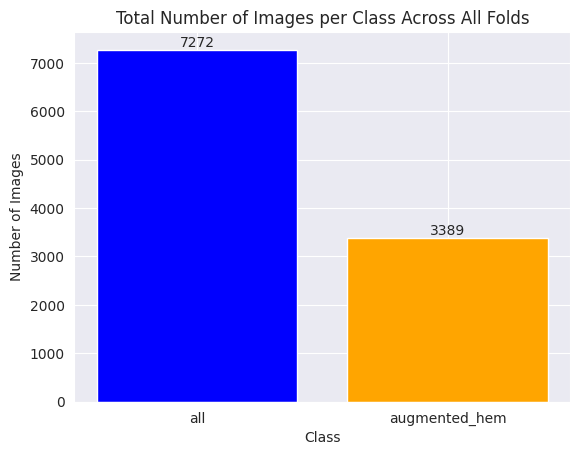

In [ ]:
# Define the base directory for training data
base_dir = "/content/C-NMC_Leukemia/training_data"

# Initialize a dictionary to hold the count of images in each class across all folds
class_counts = {'all': 0, 'augmented_hem': 0}

# Loop through each fold and add the counts to the class_counts dictionary
for fold in ['fold_0', 'fold_1', 'fold_2']:
    fold_path = os.path.join(base_dir, fold)
    for class_name in ['all', 'augmented_hem']:
        class_path = os.path.join(fold_path, class_name)
        num_images = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])
        class_counts[class_name] += num_images

# Plotting
fig, ax = plt.subplots()

# Set of different colors for the bars
colors = ['blue', 'orange']

# Plot the counts for each class
ax.bar(class_counts.keys(), class_counts.values(), color=colors)

# Adding the count above each bar
for i, (class_name, count) in enumerate(class_counts.items()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class Across All Folds')

# Show the plot
plt.show()

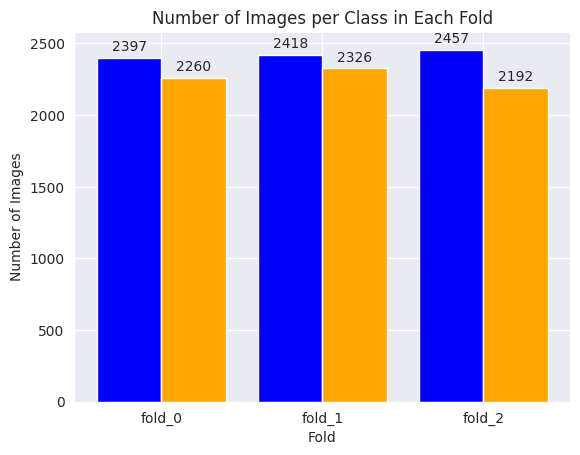

In [ ]:
# Define the base directory for training data
base_dir = "/content/C-NMC_Leukemia/training_data"

# Initialize a dictionary to hold the count of images for each fold
fold_counts = {fold: {'all': 0, 'hem': 0} for fold in ['fold_0', 'fold_1', 'fold_2']}

# Loop through each fold
for fold in fold_counts:
    # Define the path for the current fold
    fold_path = os.path.join(base_dir, fold)

    # Loop through each class in the current fold
    for class_name in ['all', 'hem']:
        # Define the path for the current class
        class_path = os.path.join(fold_path, class_name)

        # Count the number of image files in the current class directory
        num_images = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])

        # Update the count for the current class in the current fold
        fold_counts[fold][class_name] = num_images

# Plotting
# Define the figure and axes
fig, ax = plt.subplots()

# Set of different colors for the bars
colors = ['blue', 'orange']

# Loop over each fold and plot the counts for each class
bars = []  # List to keep track of the bar containers
for i, (fold, counts) in enumerate(fold_counts.items()):
    bar = ax.bar([i - 0.2, i + 0.2], counts.values(), width=0.4, label=f"{fold}", color=colors)
    bars.append(bar)

# Setting the x-ticks to be the class names, and enabling the legend
ax.set_xticks(range(len(fold_counts)))
ax.set_xticklabels(fold_counts.keys())


# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Each Fold')

# Adding the count above each bar
for bar_container in bars:
    for bar in bar_container:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show the plot
plt.show()

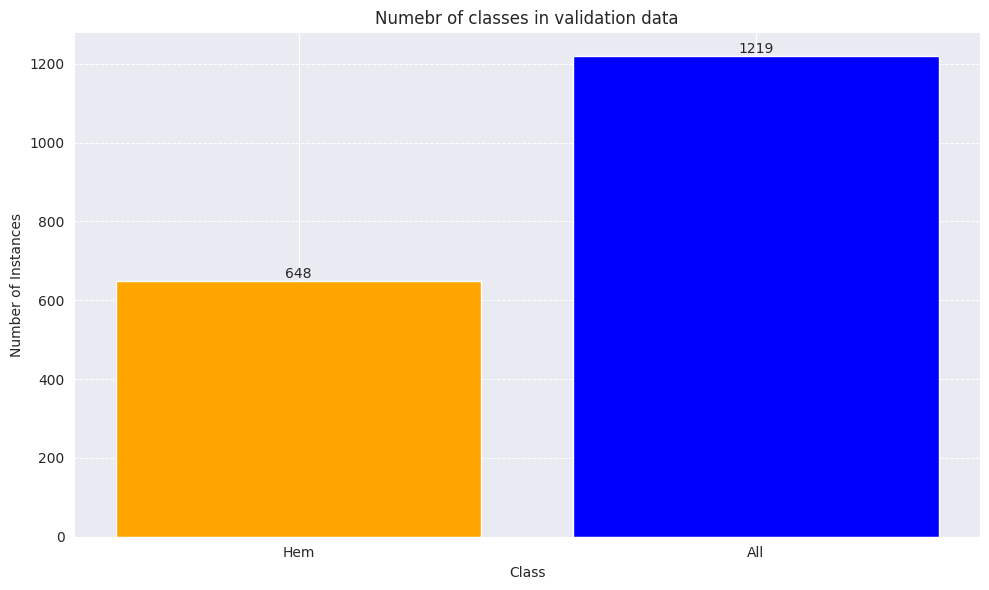

In [ ]:
# Load the CSV file into a DataFrame
file_path = '/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
data.head()

# Count the number of instances for each label
label_counts = data['labels'].value_counts()

# Create a bar graph to show the distribution of classes with annotations and different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])

# Annotate the bars with the count of each class
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Set titles and labels
plt.title('Numebr of classes in validation data')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(ticks=[1, 0], labels=['All', 'Hem'], rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Initialize a dictionary to hold the count of each image size
size_counts = {}

# Loop through each fold and class, loading each image to get its size
for fold in ['fold_0', 'fold_1', 'fold_2']:
    fold_path = os.path.join(base_dir, fold)
    for class_name in ['all', 'hem']:
        class_path = os.path.join(fold_path, class_name)

        # Iterate over each image
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if os.path.isfile(image_path):
                with Image.open(image_path) as img:
                    # Get image size (width, height)
                    size = img.size

                    # Update the size count
                    if size not in size_counts:
                        size_counts[size] = 1
                    else:
                        size_counts[size] += 1

# Now size_counts dictionary contains all unique sizes and their respective counts
# You can print it out or analyze it as needed
print("Unique image sizes and their counts:")
for size, count in size_counts.items():
    print(f"Size: {size}, Count: {count}")


Unique image sizes and their counts:
Size: (450, 450), Count: 10661


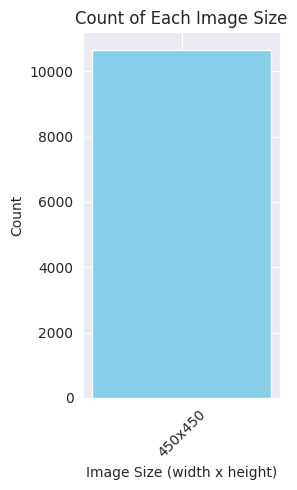

In [ ]:
# Extract the image sizes and their counts
sizes = list(size_counts.keys())
counts = list(size_counts.values())

# Convert the size tuples to string labels
size_labels = [f"{w}x{h}" for w, h in sizes]

# Create a bar graph with a narrower bar width
plt.figure(figsize=(3, 5))
plt.bar(size_labels, counts, color='skyblue', width=0.4)  # Adjust the width here

# Add labels and title to the plot
plt.xlabel('Image Size (width x height)')
plt.ylabel('Count')
plt.title('Count of Each Image Size')
plt.xticks(rotation=45)  # Rotate the x-axis labels to fit longer labels

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping of tick-labels
plt.show()


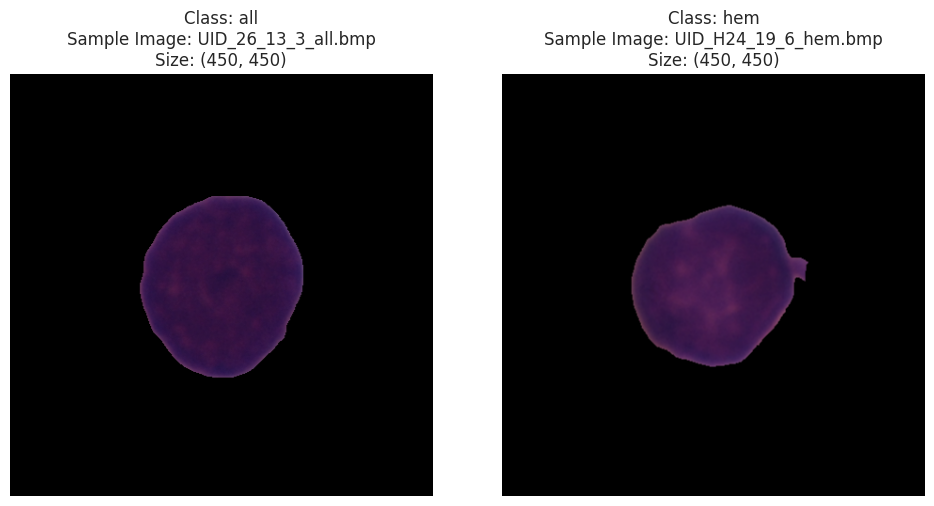

In [ ]:
# Define the subdirectories for the classes
classes = ['all', 'hem']

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Iterate over the classes to load and display an image from each
for i, class_name in enumerate(classes):
    # Access the first image from each class in 'fold_0'
    class_path = os.path.join(base_dir, 'fold_0', class_name)
    sample_image_name = os.listdir(class_path)[0]  # Taking the first image in the directory
    sample_image_path = os.path.join(class_path, sample_image_name)

    # Load the image
    with Image.open(sample_image_path) as sample_image:
        # Add a subplot for each class
        plt.subplot(1, len(classes), i+1)
        plt.imshow(sample_image)
        plt.title(f'Class: {class_name}\nSample Image: {sample_image_name}\nSize: {sample_image.size}')
        plt.axis('off')  # Hide the axis

# Adjust the layout of the plots
plt.tight_layout()
plt.show()

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
# Generate data paths with labels
def define_paths(dir):
    filepaths = []
    labels = []

    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)

        for fold_ in filelist:
            foldpath_ = os.path.join(foldpath, fold_)
            filelist_ = os.listdir(foldpath_)

            for file_ in filelist_:
                fpath = os.path.join(foldpath_, file_)
                filepaths.append(fpath)
                labels.append(fold_)

    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)


# Function that create dataframe for train, validation, and test data
def create_df(data_dir):

    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)

    strat = df['labels']
    train_df, dummy_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=123, stratify=strat)

    # test dataframe
    strat = dummy_df['labels']
    valid_df, test_df= train_test_split(dummy_df, train_size=0.5, shuffle=True, random_state=123, stratify=strat)

    return train_df, valid_df, test_df

# Show image from dataframe

In [ ]:
def create_model_data (train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. '''


    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= False, batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

#Display data sample

In [ ]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

# Count value of image

In [ ]:
def plot_label_count(df, plot_title):
    '''
    This function take df and plot labels value counts
    '''

    # Define needed variables
    vcounts = df['labels'].value_counts()
    labels = vcounts.keys().tolist()
    values = vcounts.tolist()
    lcount = len(labels)

    if lcount > 55:
        print('The number of labels is > 55, no plot will be produced')

    else:
        plot_labels(lcount, labels, values, plot_title)

def plot_labels(lcount, labels, values, plot_title):
    width = lcount * 4
    width = np.min([width, 20])

    plt.figure(figsize= (width, 5))

    form = {'family': 'serif', 'color': 'blue', 'size': 25}
    sns.barplot(labels, values)
    plt.title(f'Images per Label in {plot_title} data', fontsize= 24, color= 'blue')
    plt.xticks(rotation= 90, fontsize= 18)
    plt.yticks(fontsize= 18)
    plt.xlabel('CLASS', fontdict= form)
    yaxis_label = 'IMAGE COUNT'
    plt.ylabel(yaxis_label, fontdict= form)

    rotation = 'vertical' if lcount >= 8 else 'horizontal'
    for i in range(lcount):
        plt.text(i, values[i] / 2, str(values[i]), fontsize= 12,
                rotation= rotation, color= 'yellow', ha= 'center')

    plt.show()

In [ ]:
# Callback function

In [ ]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

# Show history of training

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


In [ ]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	'''
	This function plot confusion matrix method from sklearn package.
	'''

	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

# Create Model structure

In [ ]:
data_dir = '/content/C-NMC_Leukemia/training_data'

try:
    # Get splitted data
    train_df, valid_df, test_df = create_df(data_dir)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_model_data(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Found 9835 validated image filenames belonging to 2 classes.
Found 2107 validated image filenames belonging to 2 classes.
Found 2108 validated image filenames belonging to 2 classes.


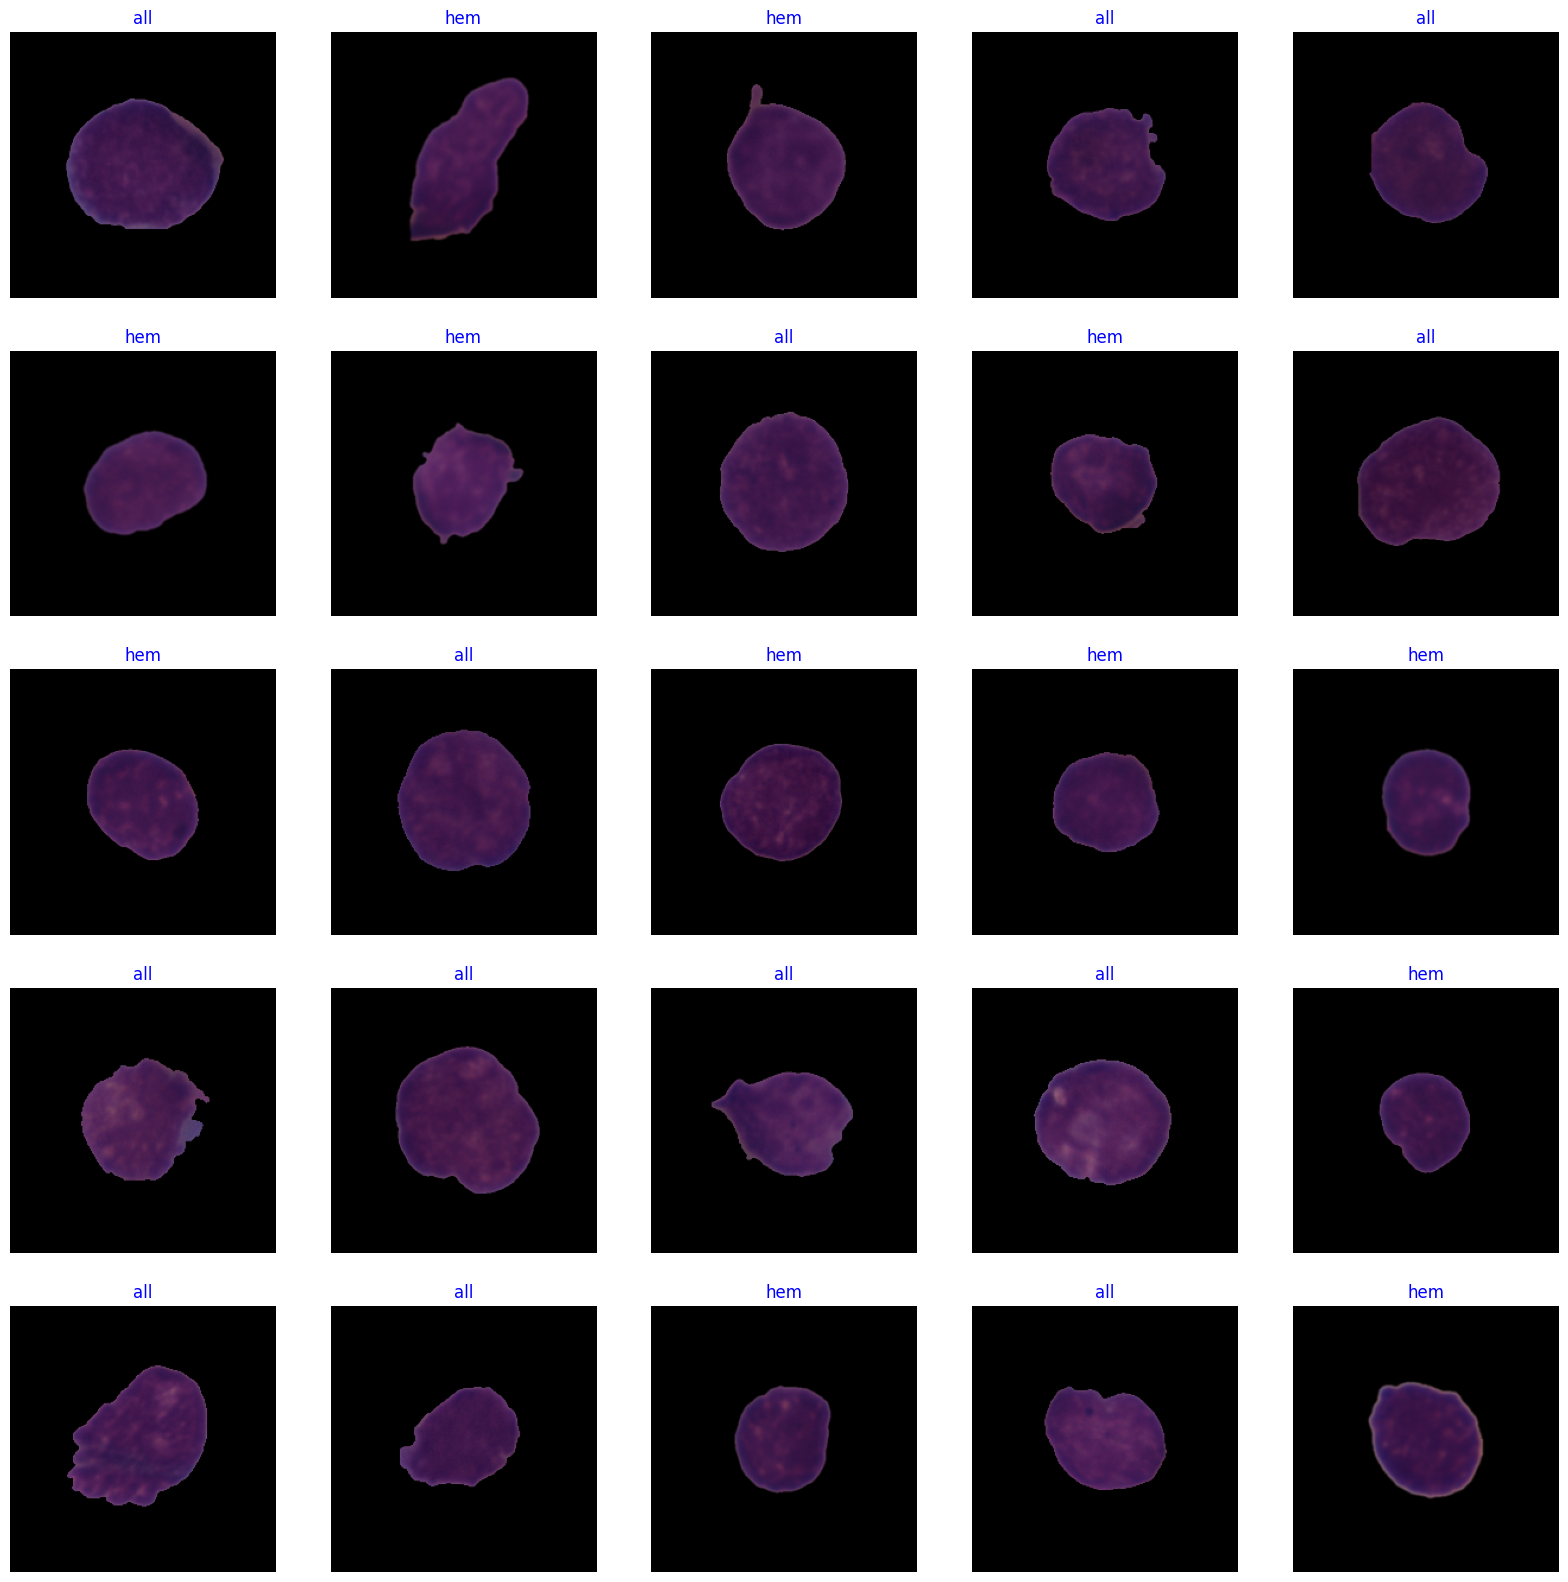

In [ ]:
show_images(train_gen)

# Model creation

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                         

In [ ]:
batch_size = 40   # set batch size for training
epochs = 40   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

# Training Model

In [ ]:
history = model.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?
y
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 1 /40     4.553   85.785   2.85831  80.683   0.00100  0.00100  accuracy     0.00    256.65 
 2 /40     1.808   91.398   1.22227  92.027   0.00100  0.00100  val_loss    57.24    167.12 
 3 /40     0.892   92.466   1.03542  76.412   0.00100  0.00100  val_loss    15.29    167.54 
 4 /40     0.491   93.849   0.37126  94.637   0.00100  0.00100  val_loss    64.14    167.85 
 5 /40     0.313   94.774   0.30520  93.830   0.00100  0.00100  val_loss    17.79    168.17 
enter H to halt training or an integer for number of epochs to run then ask again
5
 training will continue until epoch 10
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 6 /40     0.241   95.689   0.24113  94.874   0.00100  0.00100  val_loss    21.00    175.14 
 7 /40     0.201   96.279   0.34239  88.087   0.00100  0.00050  val_loss    -

# Show Model history

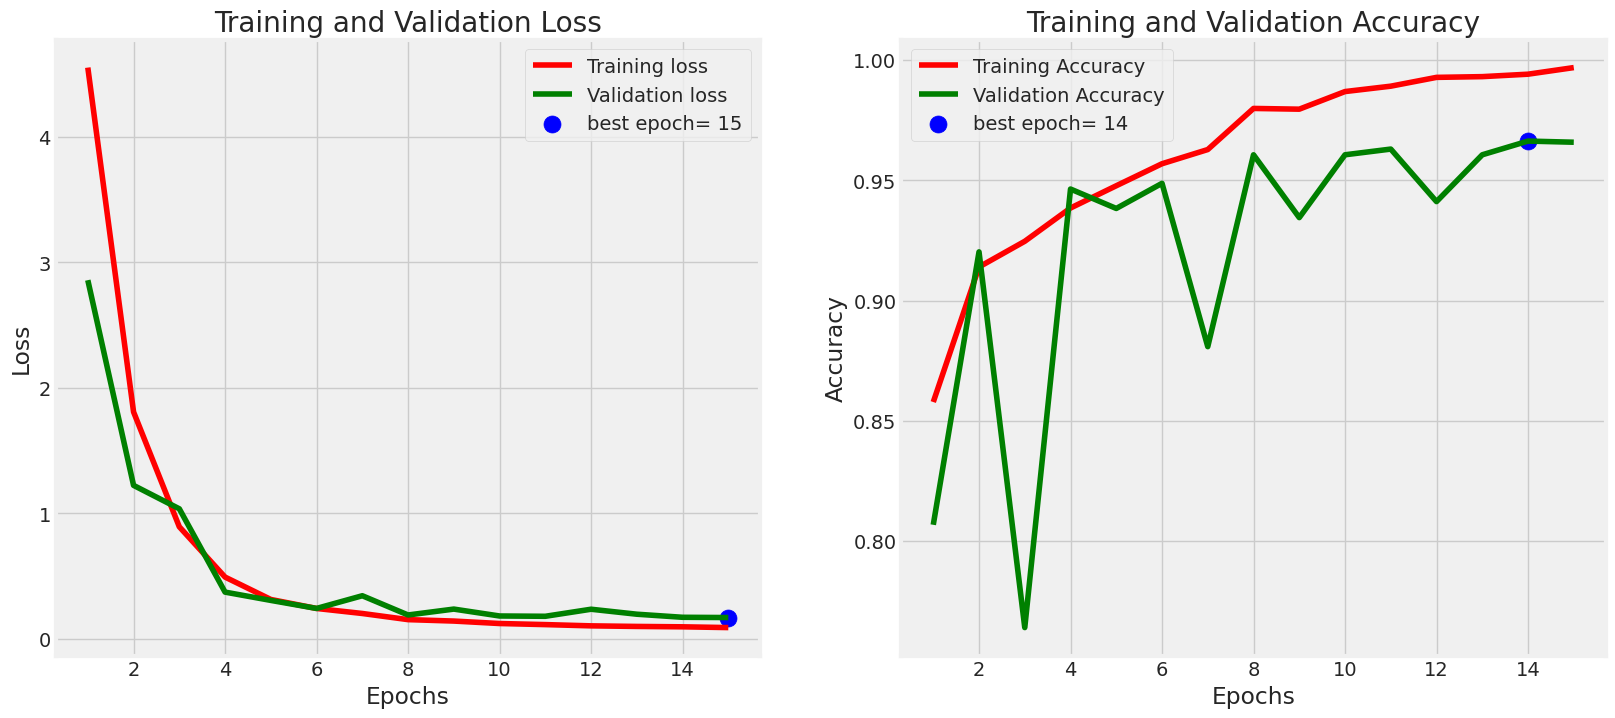

In [ ]:
plot_training(history)

# Evaluate model

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

31/31 [==============================] - 16s 463ms/step - loss: 0.1431 - accuracy: 0.9763
Train Loss:  0.07078222185373306
Train Accuracy:  1.0
--------------------
Validation Loss:  0.14343462884426117
Validation Accuracy:  0.9701613187789917
--------------------
Test Loss:  0.1431260108947754
Test Accuracy:  0.9762808084487915


# Get Predictions

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[1 1 0 ... 0 0 0]


# Confusion Matrics and Classification Report

Confusion Matrix, Without Normalization
[[1073   18]
 [  32  985]]
              precision    recall  f1-score   support

         all       0.97      0.98      0.98      1091
         hem       0.98      0.97      0.98      1017

    accuracy                           0.98      2108
   macro avg       0.98      0.98      0.98      2108
weighted avg       0.98      0.98      0.98      2108



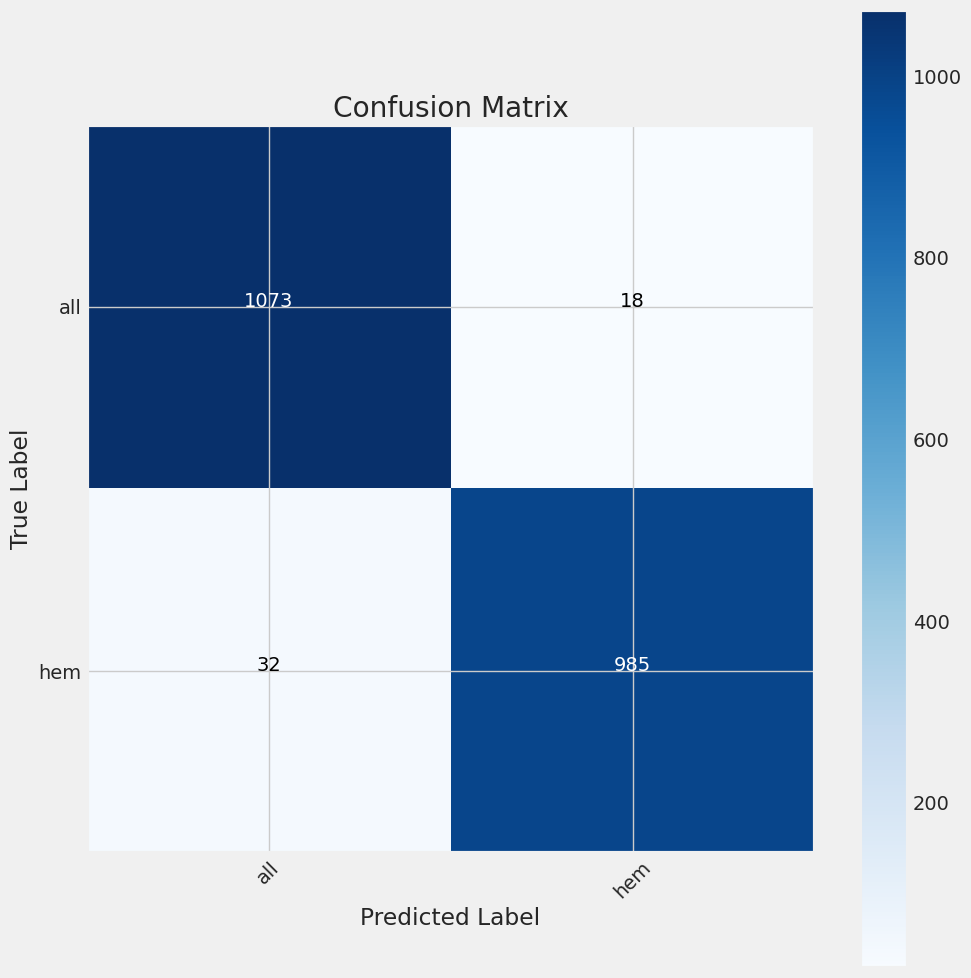

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

# Save Model

In [ ]:
model_name = model.input_names[0][:-6]
subject = input('Enter Project Subject')
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

Enter Project SubjectSubjectEfficientnetb3
model was saved as efficientnetb3-SubjectEfficientnetb3-97.63.h5
weights were saved as efficientnetb3-SubjectEfficientnetb3-weights.h5


In [ ]:
class_dict = train_gen.class_indices
img_size = train_gen.image_shape
height = []
width = []
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

Index_series = pd.Series(list(class_dict.values()), name= 'class_index')
Class_series = pd.Series(list(class_dict.keys()), name= 'class')
Height_series = pd.Series(height, name= 'height')
Width_series = pd.Series(width, name= 'width')
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis= 1)
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index= False)
print(f'class csv file was saved as {csv_save_loc}')

class csv file was saved as SubjectEfficientnetb3-class_dict.csv


# MaxVIT

In [ ]:
!pip install torch transformers datasets evaluate pillow==9.2.0
!pip install git+https://github.com/rwightman/pytorch-image-models.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


  Cloning https://github.com/rwightman/pytorch-image-models.git to /tmp/pip-req-build-_eh655sd
  Running command git clone --filter=blob:none --quiet https://github.com/rwightman/pytorch-image-models.git /tmp/pip-req-build-_eh655sd
  Resolved https://github.com/rwightman/pytorch-image-models.git to commit cd8d9d9ff35bd590ff19bfd5f89af3be8cdbabc8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for timm: filename=timm-0.9.13.dev0-py3-none-any.whl size=2232434 sha256=101e9f9089124b6e32f6c09beec6eecd6c5f610a59e0ada7eea952283f334db2
  Stored in directory: /tmp/pip-ephem-wheel-cache-4gy2jee8/wheels/ed/07/8c/d16ff40e1a6ab5eff4240181152d83e10a933e1973397a1fec
Successfully built timm


# Import lib

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import DataLoader, random_split

import timm
import timm.optim
import timm.scheduler
from timm.data import ImageDataset, create_dataset, create_loader
from timm.data.transforms_factory import create_transform

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from PIL import Image

import evaluate

import numpy as np
import pandas as pd
from scipy import stats

from tqdm.notebook import tqdm

import glob

from sklearn.model_selection import KFold

from copy import copy

import shutil

In [ ]:
import os
from PIL import Image

def count_bmp_files(root_dir):
    """
    Count the number of BMP files within a directory tree.

    :param root_dir: Root directory to start counting.
    :return: Total number of BMP files.
    """
    count = 0
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.bmp'):
                count += 1
    return count

def convert_bmp_to_png(root_dir):
    """
    Convert all BMP files to PNG within a directory tree and display progress.

    :param root_dir: Root directory to start the conversion process.
    """
    total_files = count_bmp_files(root_dir)
    converted_count = 0

    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.bmp'):
                bmp_path = os.path.join(subdir, file)
                png_path = bmp_path.replace('.bmp', '.png')

                # Open the BMP and save as PNG
                with Image.open(bmp_path) as img:
                    img.save(png_path)

                converted_count += 1
                progress_percent = (converted_count / total_files) * 100
                print(f"Converted: {bmp_path} -> {png_path} [{progress_percent:.2f}% completed]")

# Usage
convert_bmp_to_png('/content/C-NMC_Leukemia/')


เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
Converted: /content/C-NMC_Leukemia/training_data/fold_1/all/UID_30_6_7_all.bmp -> /content/C-NMC_Leukemia/training_data/fold_1/all/UID_30_6_7_all.png [72.98% completed]
Converted: /content/C-NMC_Leukemia/training_data/fold_1/all/UID_46_20_2_all.bmp -> /content/C-NMC_Leukemia/training_data/fold_1/all/UID_46_20_2_all.png [72.99% completed]
Converted: /content/C-NMC_Leukemia/training_data/fold_1/all/UID_46_20_3_all.bmp -> /content/C-NMC_Leukemia/training_data/fold_1/all/UID_46_20_3_all.png [72.99% completed]
Converted: /content/C-NMC_Leukemia/training_data/fold_1/all/UID_30_25_2_all.bmp -> /content/C-NMC_Leukemia/training_data/fold_1/all/UID_30_25_2_all.png [73.00% completed]
Converted: /content/C-NMC_Leukemia/training_data/fold_1/all/UID_34_26_5_all.bmp -> /content/C-NMC_Leukemia/training_data/fold_1/all/UID_34_26_5_all.png [73.00% completed]
Converted: /content/C-NMC_Leukemia/training_data/fold_1/all/UID_51_85_2_all.bmp -> /conten

In [ ]:
train_files = glob.glob("/content/C-NMC_Leukemia/training_data/***/**/*.png")
test_files = glob.glob("/content/C-NMC_Leukemia/testing_data/**/*.png")

# /content/C-NMC_Leukemia/testing_data/**/*.bmp
# /content/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data
# /content/C-NMC_Leukemia/training_data/***/**/*.bmp
# /content/C-NMC_Leukemia/training_data/fold_0/all/UID_11_10_1_all.bmp

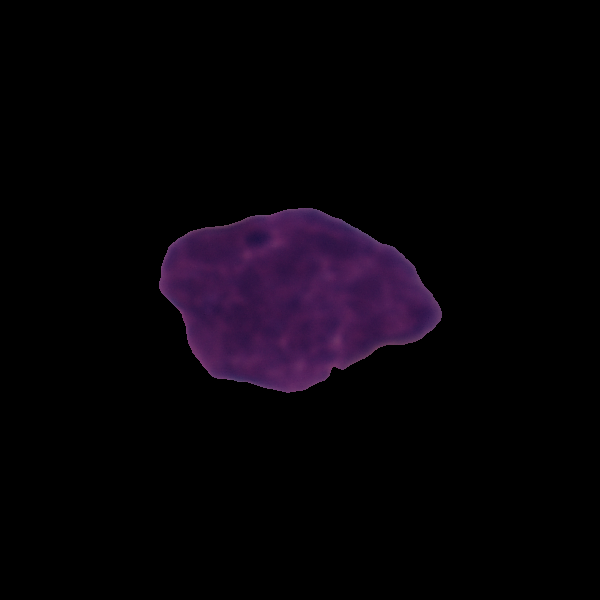

In [ ]:
example = Image.open(test_files[1]).convert("RGB")
display(example)

In [ ]:
import cv2
import numpy as np
from skimage.restoration import denoise_wavelet
from PIL import Image
from torchvision.transforms import functional as F

class NoiseReduction(object):
    def __call__(self, img):
        img_array = np.array(img)
        img_denoised = denoise_wavelet(img_array, multichannel=True)
        img_denoised = Image.fromarray((img_denoised * 255).astype(np.uint8))
        return img_denoised

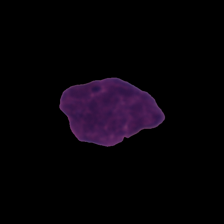

In [ ]:
import torchvision.transforms as T
transforms = {
    "train": T.Compose([
        T.Resize((224, 224), interpolation=T.InterpolationMode.BICUBIC),
        # NoiseReduction(),
        T.ToTensor(),
        # T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "test": T.Compose([
        T.Resize((224, 224), interpolation=T.InterpolationMode.BICUBIC),
        # NoiseReduction(),
        T.ToTensor(),
        # T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

toImage = T.ToPILImage()
toImage(transforms["train"](example))

In [ ]:
dataset = ImageDataset("/content/C-NMC_Leukemia/training_data/", transform=transforms["train"])

# Model Training

In [ ]:
# List all available models
timm.list_models("")

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model_name = "timm/maxvit_large_tf_224.in1k"

In [ ]:
num_epochs = 6
criterion = nn.CrossEntropyLoss()

# Gradient Accumulation Settings
# Set to 1 for no accumulation
train_batch_size = 32
eval_batch_size = 32
num_accumulate = 4

# Cross Validation Configuration
k_splits = 3
metric = evaluate.load("f1")

In [ ]:
kf = KFold(n_splits=k_splits, shuffle=True, random_state=42)

In [ ]:
all_eval_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"Fold {fold+1} of 5")

    # Load Model
    model = timm.create_model(model_name, pretrained=True, num_classes=2).to(device)

    # Load Optimizer and Scheduler
    optimizer = timm.optim.create_optimizer_v2(model, opt="AdamW", lr=1e-3)
    optimizer = timm.optim.Lookahead(optimizer, alpha=0.5, k=6)

    scheduler = timm.scheduler.create_scheduler_v2(optimizer, num_epochs=num_epochs)[0]

    # Load Data
    train_dataset = torch.utils.data.Subset(dataset, train_idx)
    val_dataset = torch.utils.data.Subset(dataset, val_idx)

    train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=eval_batch_size, shuffle=False)

    # Reset Model Info
    info = {
        "metric_train": [],
        "metric_val": [],
        "train_loss": [],
        "val_loss": [],
        "best_metric_val": -999,
    }

    for epoch in range(num_epochs):
        train_loss_epoch = []
        val_loss_epoch = []

        train_preds = []
        train_targets = []

        val_preds = []
        val_targets = []

        num_updates = epoch * len(train_dataloader)

        # Train Loop
        model.train()
        for idx, batch in enumerate(tqdm(train_dataloader)):
            inputs, targets = batch
            outputs = model(inputs.to(device))
            loss = criterion(outputs, targets.to(device))

            loss.backward()

            if ((idx + 1) % num_accumulate == 0) or (idx + 1 == len(train_dataloader)):
                optimizer.step()
                scheduler.step_update(num_updates=num_updates)
                optimizer.zero_grad()

            train_loss_epoch.append(loss.item())
            train_preds += outputs.argmax(-1).detach().cpu().tolist()
            train_targets += targets.tolist()

        optimizer.sync_lookahead()
        scheduler.step(epoch + 1)

        # Eval Loop
        model.eval()
        with torch.no_grad():
            for batch in tqdm(val_dataloader):
                inputs, targets = batch
                outputs = model(inputs.to(device))
                loss = criterion(outputs, targets.to(device))

                # Log Values
                val_loss_epoch.append(loss.item())
                val_preds += outputs.argmax(-1).detach().cpu().tolist()
                val_targets += targets.tolist()

        # Log Data
        metric_train = metric.compute(predictions=train_preds, references=train_targets, average="macro")["f1"]
        metric_val = metric.compute(predictions=val_preds, references=val_targets, average="macro")["f1"]

        info["metric_train"].append(metric_train)
        info["metric_val"].append(metric_val)

        info["train_loss"].append(np.average(train_loss_epoch))
        info["val_loss"].append(np.average(val_loss_epoch))

        if metric_val > info["best_metric_val"]:
            print("New Best Score!")
            info["best_metric_val"] = metric_val
            torch.save(model, f"checkpoint_fold{fold}.pt")

        print(info)
        print(f"Fold: {fold} | Epoch: {epoch} | Metric: {metric_val} | Training Loss: {np.average(train_loss_epoch)} | Validation Loss: {np.average(val_loss_epoch)}")

    all_eval_scores.append(info["best_metric_val"])

Fold 1 of 5


OutOfMemoryError: ignored

In [ ]:
import shutil
import os

# Specify the folder path you want to download
folder_to_download = '/content/C-NMC_Leukemia'  # Replace with the actual folder path

# Specify the name for the zip file
zip_filename = 'my_folder.zip'

# Create a zip archive of the folder
shutil.make_archive('/content/' + zip_filename, 'zip', folder_to_download)

# Move the zip file to the /content directory for easy download
shutil.move(zip_filename + '.zip', '/content/' + zip_filename)

# Provide a download link for the zip file
print(f"Click the link to download the zip file: [Download {zip_filename}](/content/{zip_filename})")


Click the link to download the zip file: [Download my_folder.zip](/content/my_folder.zip)
